#### note: the basic plots are covered is data analysis(EDA) section .This file consist a bit more clear visulase on the data to get clear insights

# Data Visualization

In [1]:
#import the libraries required for the data visualization
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#for the interactive visuals let us import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf #import cufflinks 
init_notebook_mode(connected=True) #to connect to jupyter notebook
cf.go_offline() # to go offline


In [6]:
#load the data
data = pd.read_excel(r'C:\Users\Zuhaib\CDS EXAM\My Project\data\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [7]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

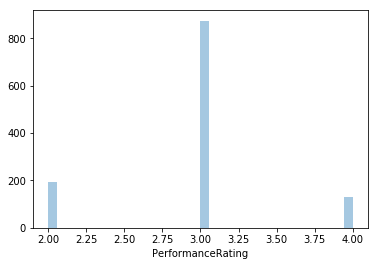

In [8]:
sns.distplot(data['PerformanceRating'],kde=False)

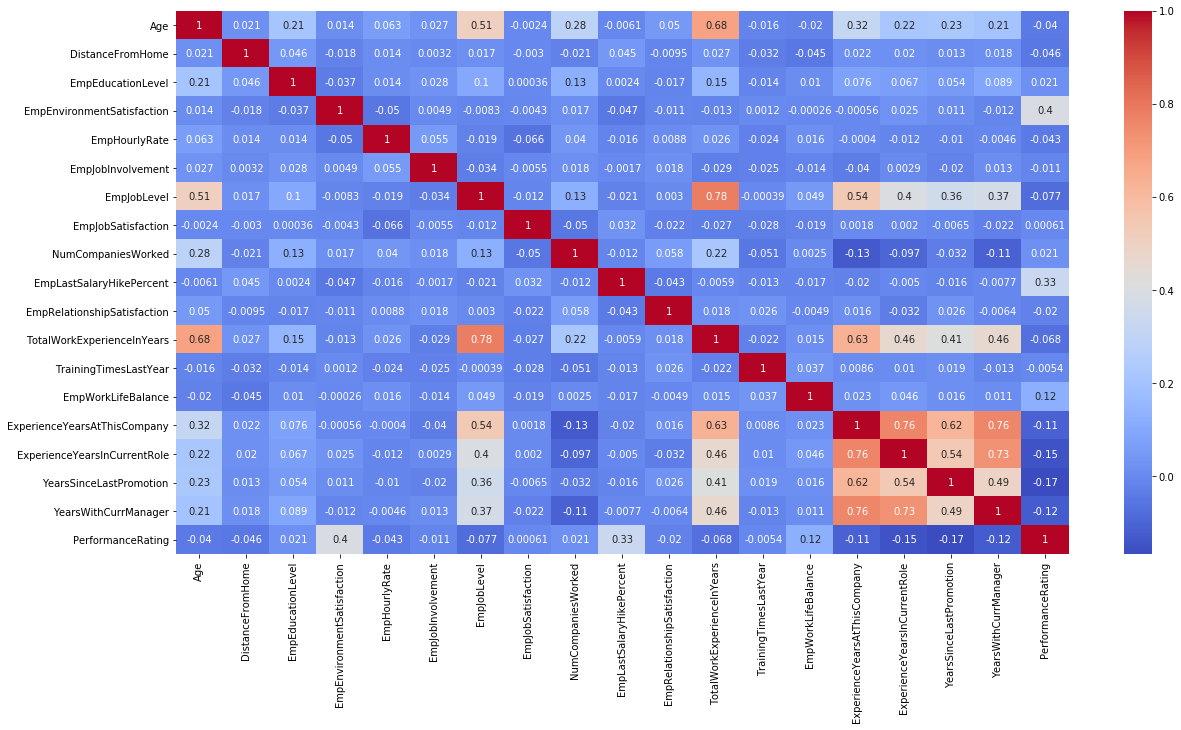

In [9]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap

<Figure size 1800x720 with 0 Axes>

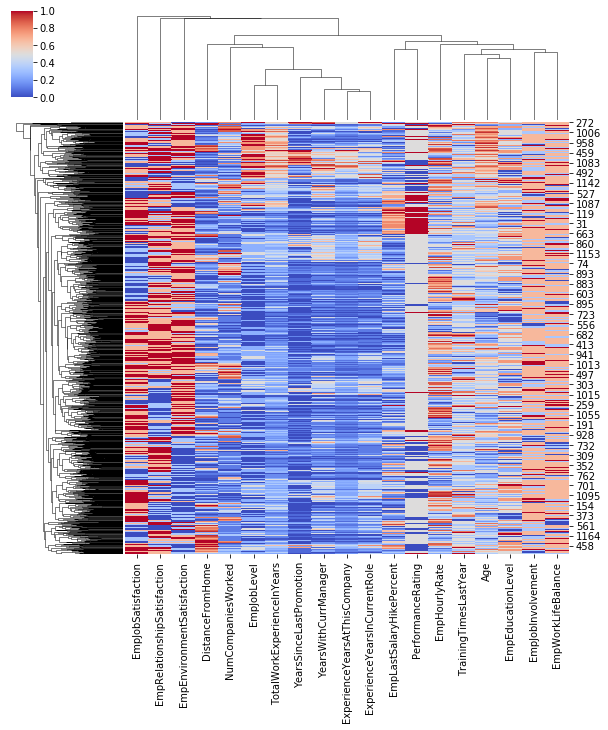

In [10]:
plt.figure(figsize=(25,10))
sns.clustermap(data._get_numeric_data(),cmap='coolwarm',standard_scale=1)

### pair plot
- to find the relationship between the entire data set

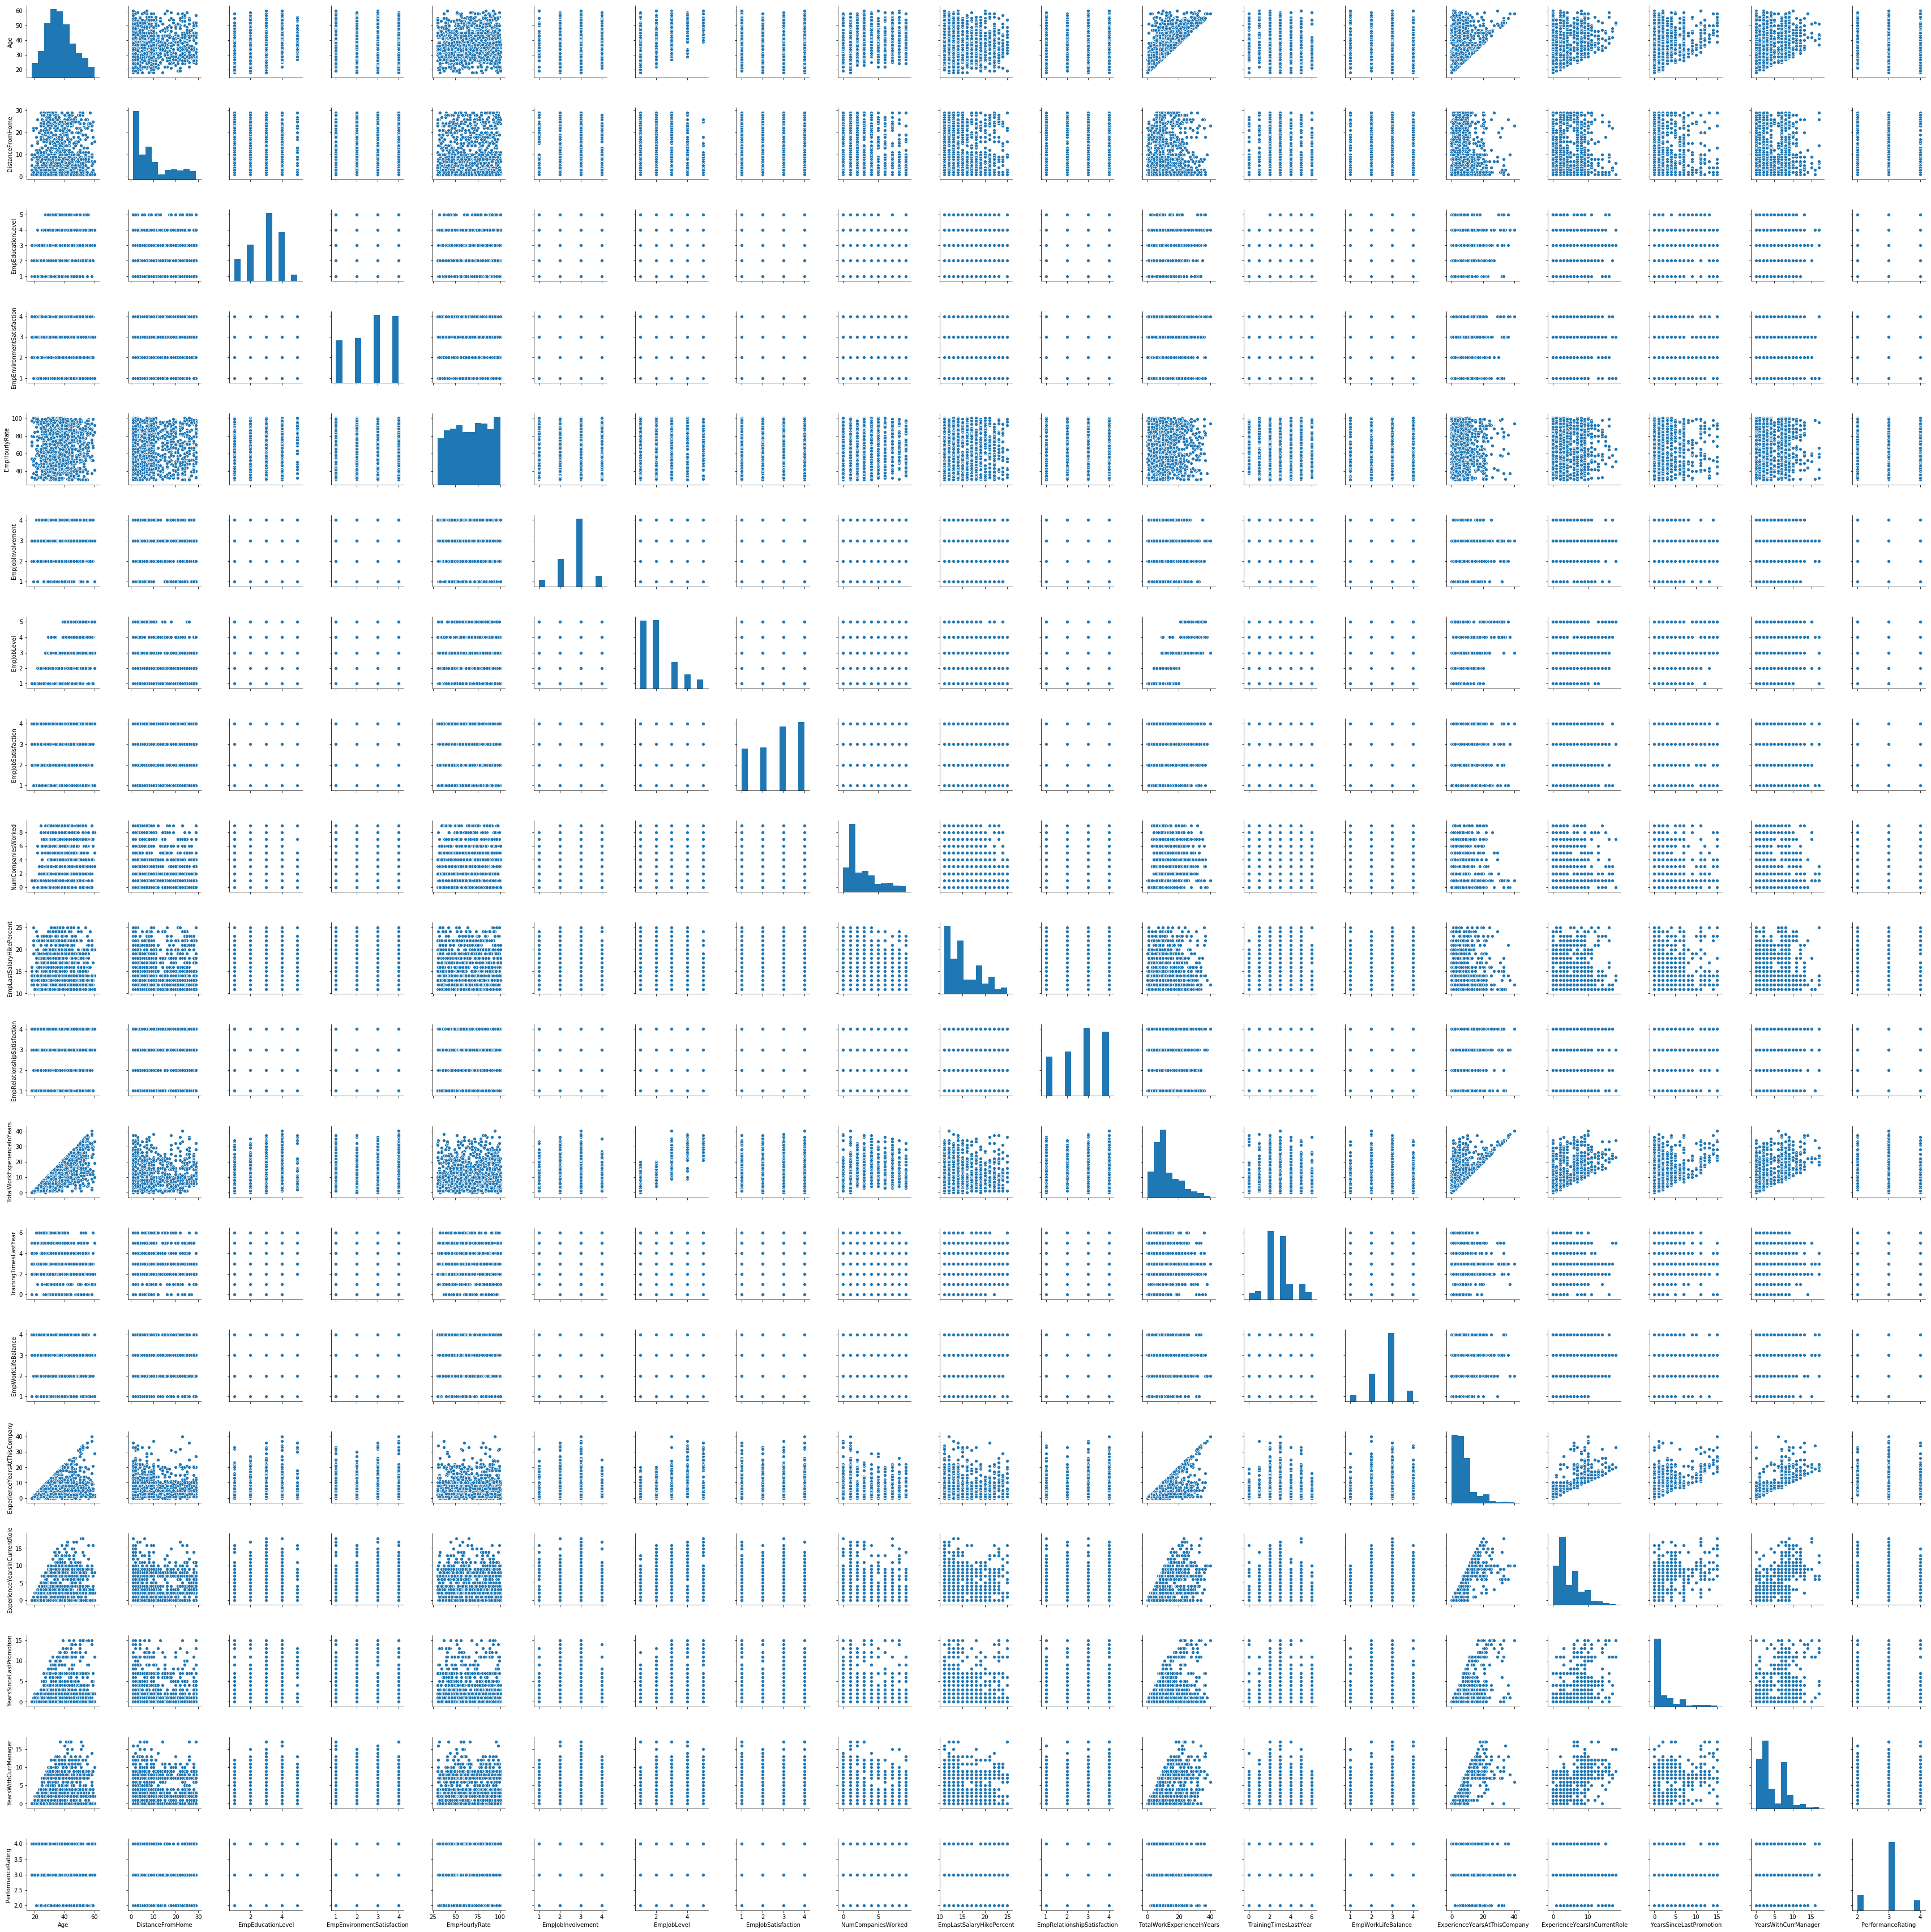

In [11]:
sns.pairplot(data)

C:\Users\Zuhaib\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Zuhaib\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



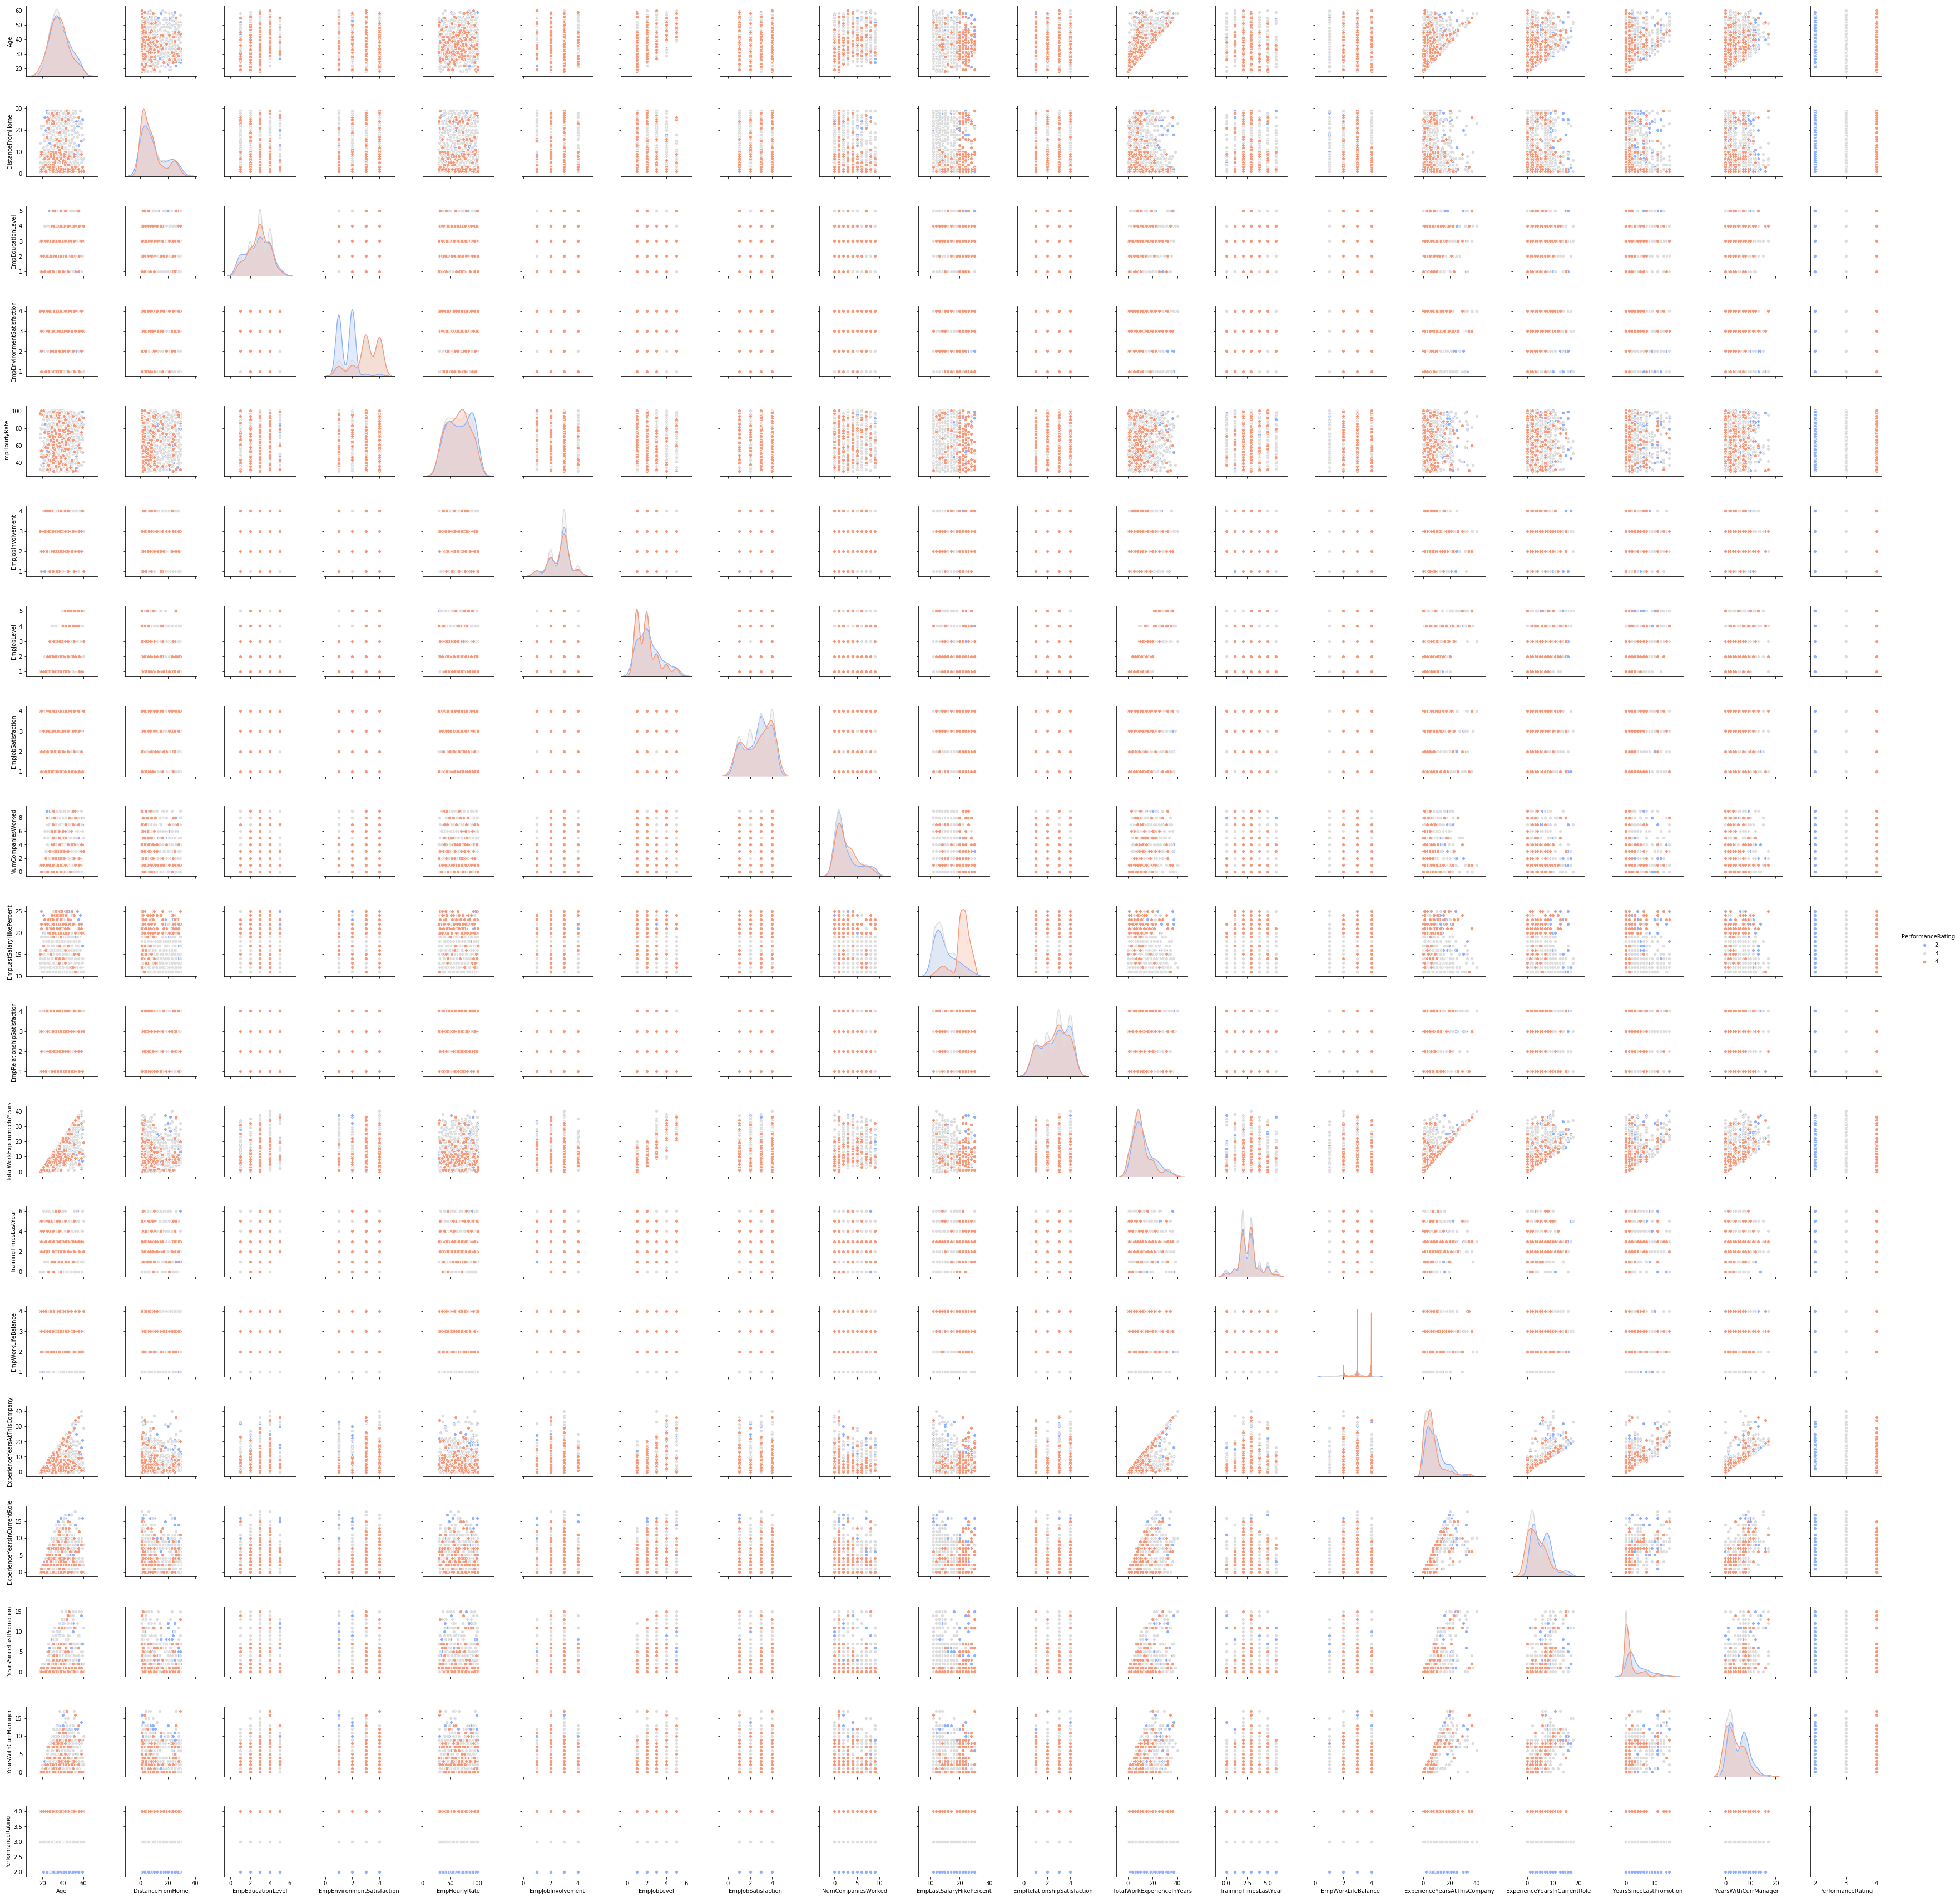

In [12]:
sns.pairplot(data,hue='PerformanceRating',palette='coolwarm')

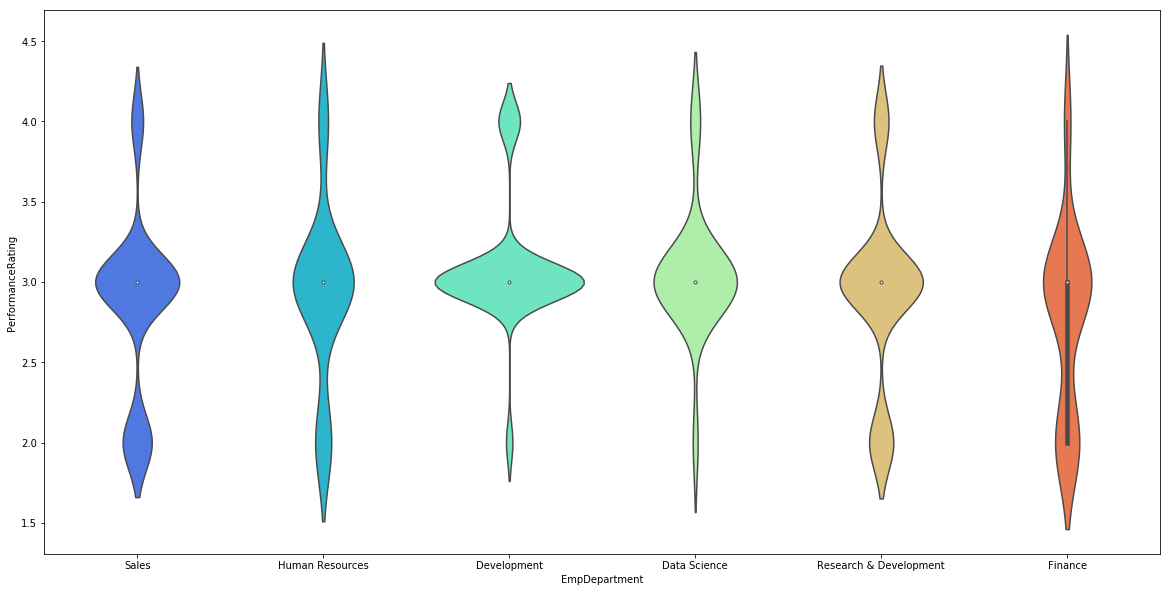

In [13]:
#violin plot for performance based on department
plt.figure(figsize=(20,10))
sns.violinplot(x=data.EmpDepartment, y=data.PerformanceRating, data=data,palette='rainbow')

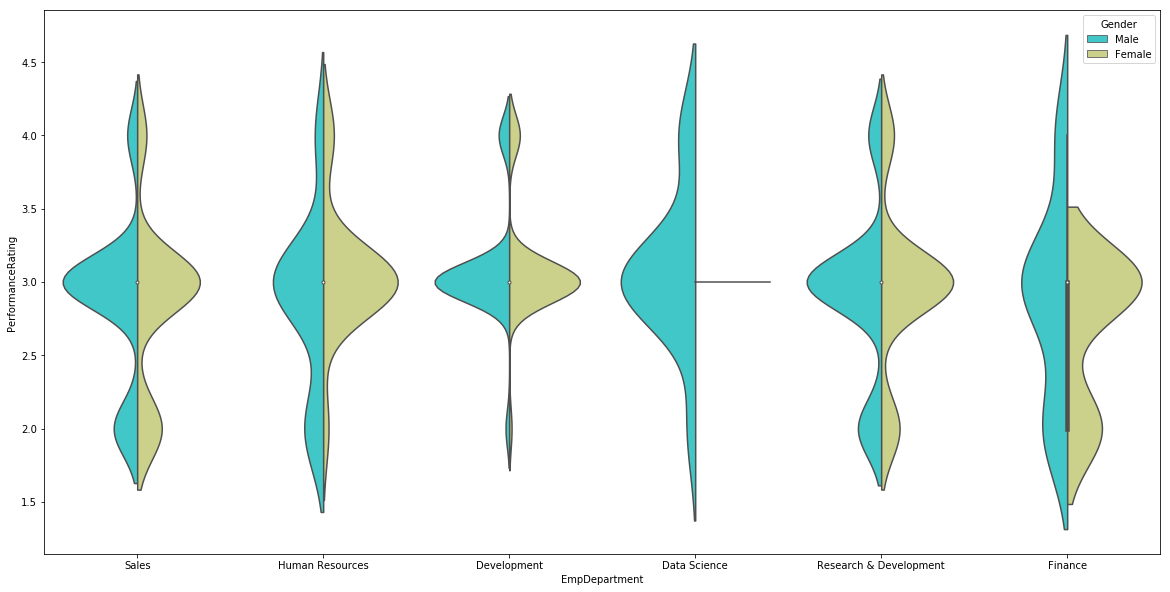

In [14]:
plt.figure(figsize=(20,10))
sns.violinplot(x=data.EmpDepartment, y=data.PerformanceRating, data=data,hue='Gender',split=True,palette='rainbow')

- this graph is giving us a clear picture based on the gender based performance in the individual department

#### Let us analyse the linearity betwwen the important features

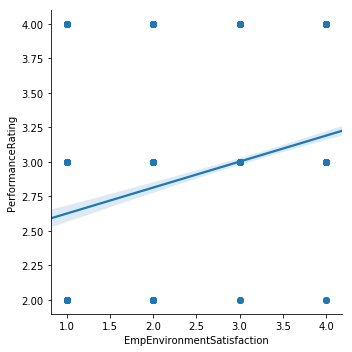

In [15]:
sns.lmplot(x='EmpEnvironmentSatisfaction',y='PerformanceRating',data=data)

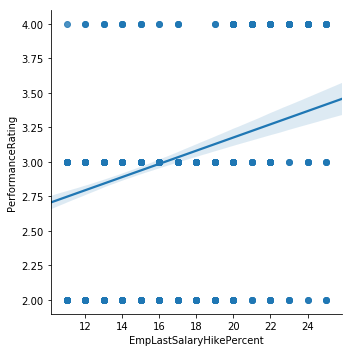

In [16]:
sns.lmplot(x='EmpLastSalaryHikePercent',y='PerformanceRating',data=data)

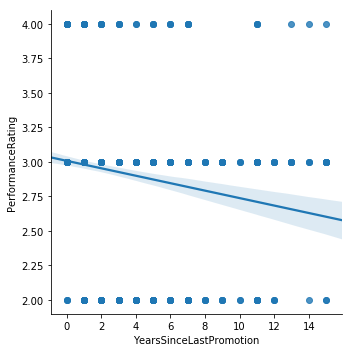

In [17]:
sns.lmplot(x='YearsSinceLastPromotion',y='PerformanceRating',data=data)

#### visual based on the area covered by the curve

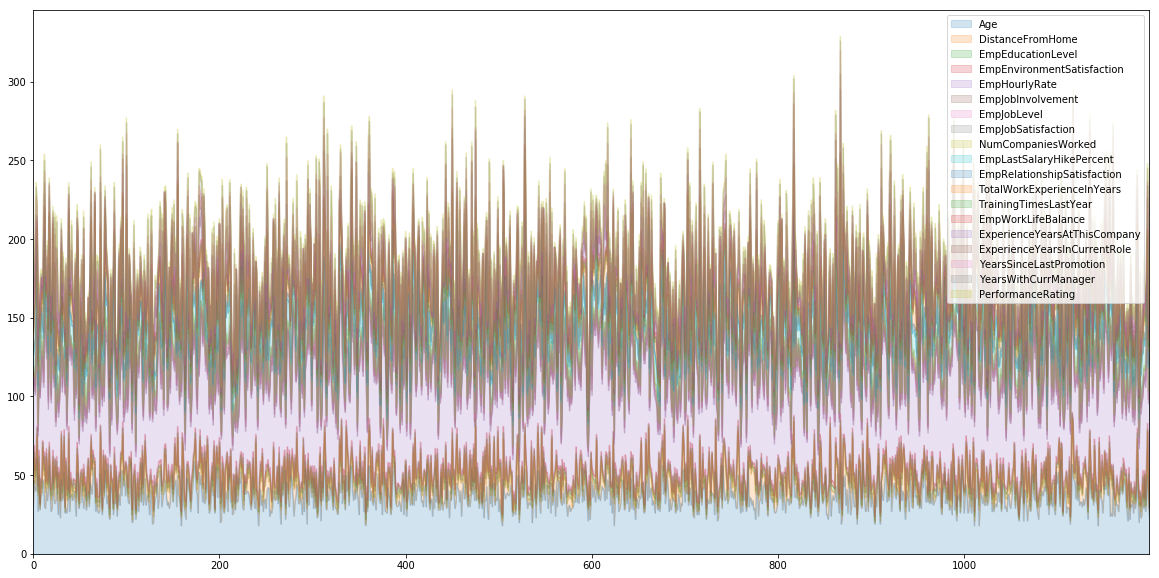

In [18]:

data._get_numeric_data().plot.area(alpha =0.2
                                  ,figsize=(20,10))

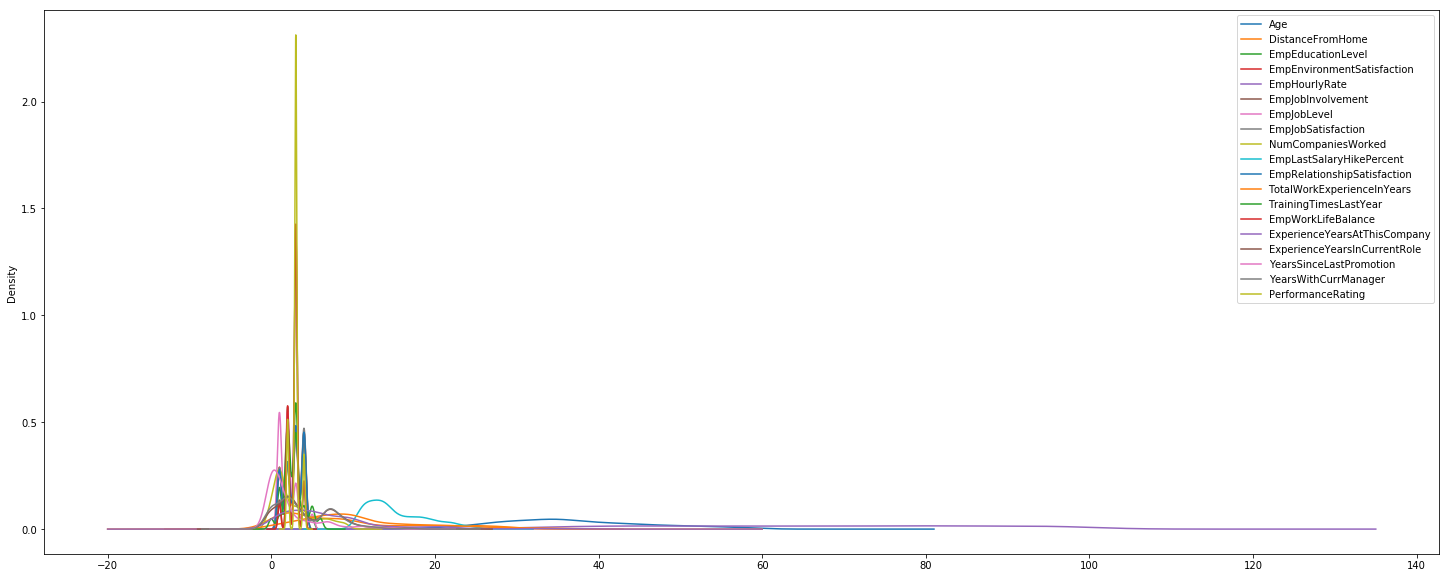

In [19]:
data._get_numeric_data().plot.density(figsize=(25,10))

## interactive plots

In [20]:
plt.figure(figsize=(20,10))
data.iplot()

<Figure size 1440x720 with 0 Axes>

In [21]:
#plot based on employee educational level 
data.iplot(kind='scatter',x='EmpEducationLevel',y='PerformanceRating',mode='markers',size=10)

In [22]:
#number of performers in the each group(rating 2,3 & 4)
d = data.groupby(by='PerformanceRating')
d.count().iplot(kind='bar')

- This above graph is giving us a very clear insight of the number of performer in each set and their respective criterion

#### let us analyse the performance rating based on environmentSatisfaction and salaryhike

In [23]:
df = pd.DataFrame({'x':data.EmpEnvironmentSatisfaction,'y':data.EmpLastSalaryHikePercent,'z':data.PerformanceRating})
df.iplot(kind='surface',colorscale='rdylbu')

In [24]:
df1 = pd.DataFrame({'x':data.TotalWorkExperienceInYears,'y':data.EmpLastSalaryHikePercent,'z':data.PerformanceRating})
df1.iplot(kind='surface',colorscale='rdylbu')

In [25]:
#analyse the performnace  based on total work experince
data[['TotalWorkExperienceInYears','PerformanceRating']].iplot(kind='spread')

In [26]:
#performace based on environmentsatisfaction
data[['EmpEnvironmentSatisfaction','PerformanceRating']].iplot(kind='spread')

In [27]:
#performnace based on salary hike 
data[['EmpLastSalaryHikePercent','PerformanceRating']].iplot(kind='spread')

In [28]:
#bubble plot based on environmentsatisfaction and employedepartmet and size depends of performance 
data.iplot(kind='bubble',x='EmpEnvironmentSatisfaction',y='EmpDepartment',size='PerformanceRating')